# Image Classification with Transfer Learning
**Previously I used feature extraction transfer learning, Here I will use Transfer Learning Fine-Tuning for my multi-class Image Classification with traning data to see how much accuracy will I get from this.**

*Till now I have used `Sequential API` for my model but now I will use `Functional API` for my model. Here I will first use feature extraction with different training data size and augumentation, Then will use fine-tuning to see which model has the best performance*



---


# model_1 : Feature Extraction with 10% Training Data

In [2]:
# get data and unzip the data
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Food_Image_Data/10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in '10_food_classes_10_percent'.
There are 10 directory and 0 images in '10_food_classes_10_percent/test'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directory and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 

In [4]:
# create traning and test directory paths

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (224,224)

train_data_10_per = image_dataset_from_directory(train_dir,
                                                 image_size=IMG_SIZE,
                                                 label_mode="categorical",
                                                 batch_size=32)

test_data = image_dataset_from_directory(test_dir,
                                         image_size=IMG_SIZE,
                                         label_mode="categorical",
                                         batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
train_data_10_per.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
# Creating a tensorboard callback
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log file to: {log_dir} ")
  return tensorboard_callback

In [8]:
 # Creating feature extraction model using keras Function API

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs)
print(f"Shape after passing input through model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data_10_per,
                    epochs=5,
                    steps_per_epoch=len(train_data_10_per),
                    validation_data=test_data,
                    validation_steps=int(0.25 * len(test_data)),
                    callbacks=[create_tensorboard_callback(dir_name="Transfer_Learning",
                                                           experiment_name="10_per_data_FeatureExtractionn")])

16705208/16705208 [==============================] - 0s 0us/step
Shape after passing input through model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log file to: Transfer_Learning/10_per_data_FeatureExtractionn/20231225-062900 
Epoch 1/5
24/24 [==============================] - 138s 5s/step - loss: 1.9375 - accuracy: 0.3773 - val_loss: 1.3425 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 144s 6s/step - loss: 1.1352 - accuracy: 0.7427 - val_loss: 0.8870 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - 104s 4s/step - loss: 0.8065 - accuracy: 0.8107 - val_loss: 0.7140 - val_accuracy: 0.8405
Epoch 4/5
24/24 [==============================] - 142s 6s/step - loss: 0.6406 - accuracy: 0.8693 - val_loss: 0.6169 - val_accuracy: 0.8602
Epoch 5/5
24/24 [==============================] - 103s 4s/step - loss: 0.5410 - accuracy: 0.8813 - val_loss: 0.5529 - val_accuracy: 0.8684


In [9]:
model.evaluate(test_data)

79/79 [==============================] - 211s 3s/step - loss: 0.5603 - accuracy: 0.8660


[0.5602765083312988, 0.8659999966621399]

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


In [11]:
# Plot validation and traning curves separately
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  '''
  Return seperate loss curves for traning and validation metrics.
  '''
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

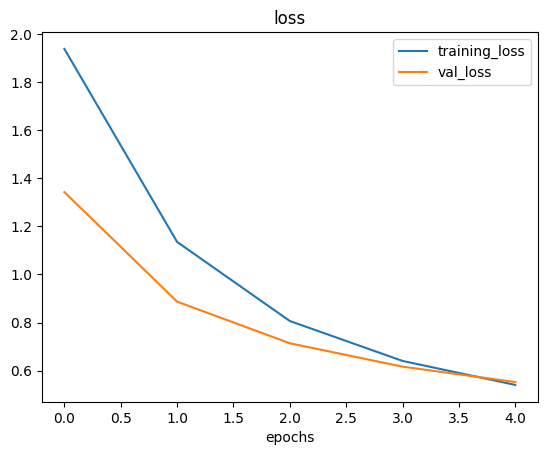

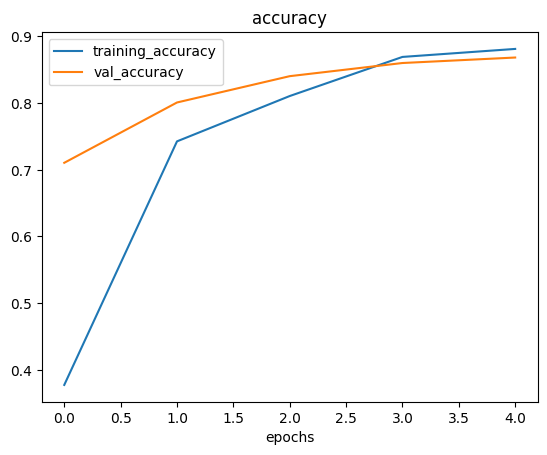

In [12]:
plot_loss_curves(history)

# model_2 : Feature Extraction with 1% Traning data with Augmentation

In [13]:
# Download and unzip data
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Food_Image_Data/10_food_classes_1_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [14]:
# Walk through data
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_1_percent"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in '10_food_classes_1_percent'.
There are 10 directory and 0 images in '10_food_classes_1_percent/test'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directory and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 10 directory

In [15]:
# create traning and test directory
train_dir_1_per = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [16]:
IMG_SIZE = (224,224)
train_data_1_per = image_dataset_from_directory(train_dir_1_per,
                                                label_mode="categorical",
                                                image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode="categorical",
                                         image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
# data Augmentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name="Data_Augmentation")

(-0.5, 461.5, 490.5, -0.5)

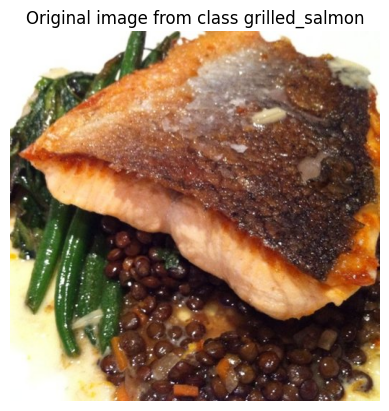

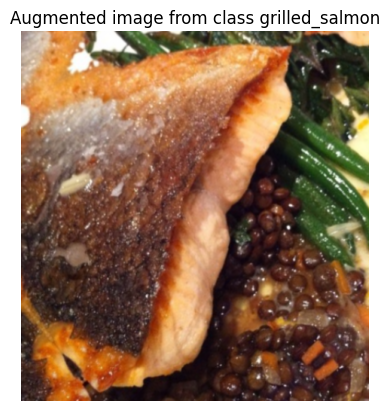

In [18]:
# View random image of original image and augmented image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

target_class = random.choice(train_data_1_per.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# for original Image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original image from class {target_class}")
plt.axis(False)

# For Augmented image
aug_img = data_aug(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(aug_img)/255.)
plt.title(f"Augmented image from class {target_class}")
plt.axis(False)

In [19]:
# create model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_aug(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_avg_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_1_per,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_per),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=create_tensorboard_callback(dir_name="transfer_learning",
                                                              experiment_name="1_per_data_aug_FeatureExtraction"))

Saving TensorBoard log file to: transfer_learning/1_per_data_aug_FeatureExtraction/20231225-064531 
Epoch 1/5
3/3 [==============================] - 98s 44s/step - loss: 2.3998 - accuracy: 0.1286 - val_loss: 2.2459 - val_accuracy: 0.1546
Epoch 2/5
3/3 [==============================] - 87s 42s/step - loss: 2.1189 - accuracy: 0.2143 - val_loss: 2.0885 - val_accuracy: 0.2648
Epoch 3/5
3/3 [==============================] - 88s 42s/step - loss: 1.9562 - accuracy: 0.3714 - val_loss: 1.9964 - val_accuracy: 0.3322
Epoch 4/5
3/3 [==============================] - 89s 43s/step - loss: 1.7507 - accuracy: 0.5429 - val_loss: 1.8799 - val_accuracy: 0.4309
Epoch 5/5
3/3 [==============================] - 54s 26s/step - loss: 1.6167 - accuracy: 0.6286 - val_loss: 1.7936 - val_accuracy: 0.4819


In [20]:
model_2.evaluate(test_data)

79/79 [==============================] - 195s 2s/step - loss: 1.7869 - accuracy: 0.4864


[1.786901593208313, 0.4864000082015991]

In [21]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_Augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_avg_pooling_layer (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

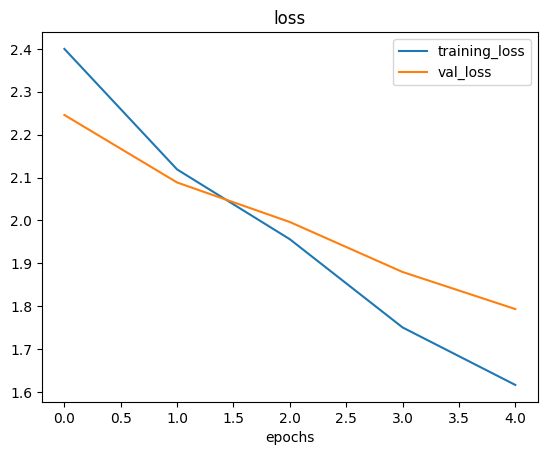

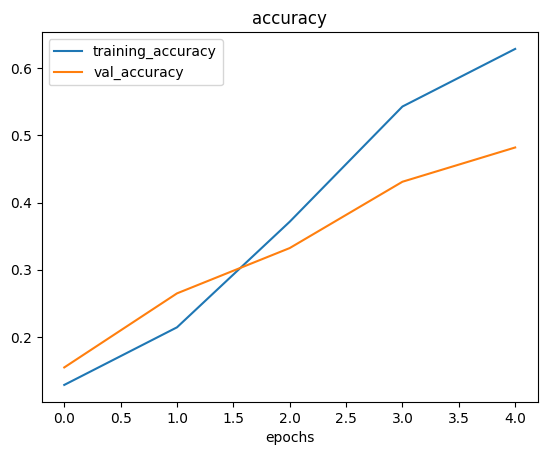

In [22]:
# plot loss curves
plot_loss_curves(history_2)

# model_3 : Feature Extraction with 10% Training Data with Augmentation

In [24]:
# download and unzipn the data

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Food_Image_Data/10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [116]:
# create the directories paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [117]:
IMG_SIZE = (224, 224)

train_data_10_per = image_dataset_from_directory(train_dir,
                                                 label_mode="categorical",
                                                 image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_dir,
                                         label_mode="categorical",
                                         image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [118]:
# Data Augmentation
data_aug = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name="Data_augmentation")

(-0.5, 457.5, 424.5, -0.5)

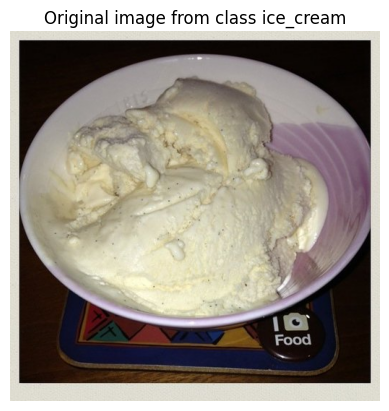

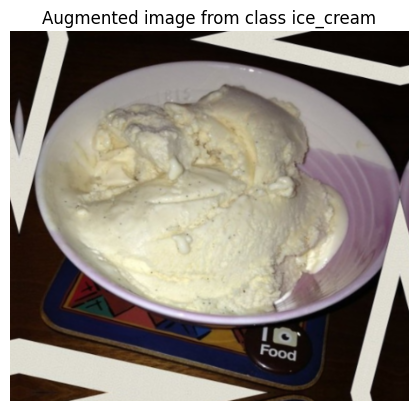

In [119]:
# View random image of original image and augmented image

target_class = random.choice(train_data_1_per.class_names)
target_dir = "10_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# for original Image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original image from class {target_class}")
plt.axis(False)

# For Augmented image
aug_img = data_aug(tf.expand_dims(img, axis=0))
plt.figure()
plt.imshow(tf.squeeze(aug_img)/255.)
plt.title(f"Augmented image from class {target_class}")
plt.axis(False)

In [134]:
# create model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_aug(inputs)
x= base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)
model_3 = tf.keras.Model(inputs, outputs)

# compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [135]:
model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 Data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [122]:
# Creating a model checkpoint callback
checkpoint_path = "10_per_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [123]:
# fit model with modelcheckpoint callback
initial_epochs = 5

history_3 = model_3.fit(train_data_10_per,
                        epochs=initial_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                              experiment_name="10_per_data_aug_FeatureExtraction"),
                        checkpoint_callback])

Saving TensorBoard log file to: transfer_learning/10_per_data_aug_FeatureExtraction/20231225-084718 
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9569 - accuracy: 0.3547
Epoch 1: saving model to 10_per_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 121s 5s/step - loss: 1.9569 - accuracy: 0.3547 - val_loss: 1.4545 - val_accuracy: 0.6497
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2834 - accuracy: 0.7040
Epoch 2: saving model to 10_per_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 144s 6s/step - loss: 1.2834 - accuracy: 0.7040 - val_loss: 0.9941 - val_accuracy: 0.8010
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9940 - accuracy: 0.7707
Epoch 3: saving model to 10_per_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 143s 6s/step - loss: 0.9940 - accuracy: 0.7707 - val_loss: 0.8309 - val_accuracy: 0.8125
Epoch 4/

In [124]:
# evaluate the model
model_3_evaluation = model_3.evaluate(test_data)
model_3_evaluation

79/79 [==============================] - 193s 2s/step - loss: 0.6171 - accuracy: 0.8464


[0.6170915365219116, 0.8464000225067139]

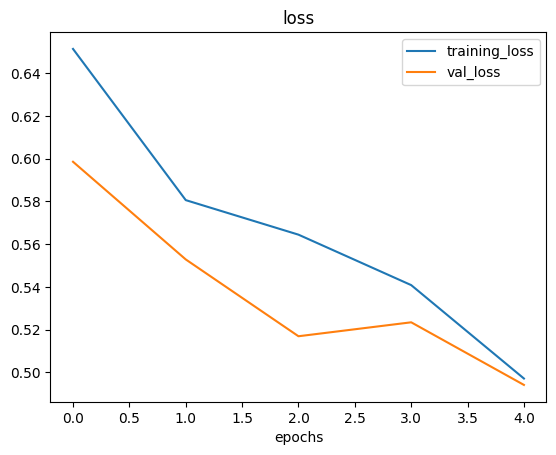

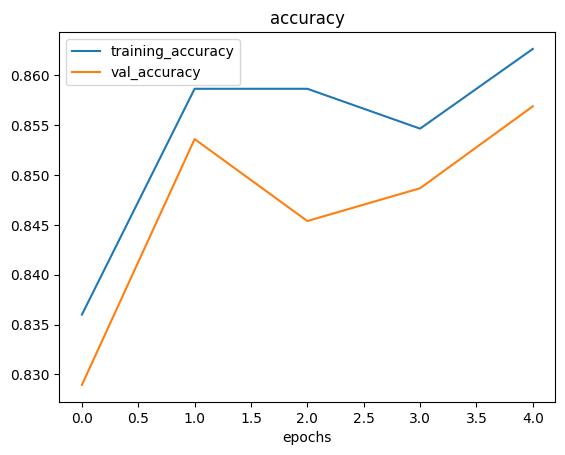

In [38]:
plot_loss_curves(history_3)

In [40]:
# load in saved model weight
model_3.load_weights(checkpoint_path)

In [41]:
# evaluate model_3 with loaded weights
loaded_model_3_evaluation = model_3.evaluate(test_data)

79/79 [==============================] - 196s 2s/step - loss: 0.4972 - accuracy: 0.8604


In [42]:
# comparing evaluation
loaded_model_3_evaluation == model_3_evaluation

False

In [43]:
# checking if loaded result is close to previous result
import numpy as np
np.isclose(np.array(loaded_model_3_evaluation), np.array(model_3_evaluation))

array([ True,  True])

# model_4: Fine-Tuning with 10% Training Data on existing model_3

In [125]:
# check clone model
model_3.evaluate(test_data)

79/79 [==============================] - 172s 2s/step - loss: 0.6171 - accuracy: 0.8464


[0.6170914769172668, 0.8464000225067139]

In [136]:
# layers in model
model_3.layers

In [137]:
# checking layers trainable or not
for layer in model_3.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x799c5e517dc0> True
<keras.src.engine.sequential.Sequential object at 0x799c4ea7a260> True
<keras.src.engine.functional.Functional object at 0x799c376be770> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x799c3c1cdf00> True
<keras.src.layers.core.dense.Dense object at 0x799c376d67d0> True


In [138]:
# checking layers in base model
for i, layer in enumerate(model_3.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [139]:
# total trainable in model
print(len(model_3.layers[2].trainable_variables))

0


In [140]:
# unfreezing all layers
base_model.trainable = True

# Freezing all layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [141]:
# checking layers in base model
for layer_number, layer in enumerate(model_3.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [142]:
# total trainable in model
print(len(model_3.layers[2].trainable_variables))

10


In [143]:
# fine tuning
fine_tune_epoch = initial_epochs + 5

# fit the model
history_4 = model_3.fit(train_data_10_per,
                        epochs=fine_tune_epoch,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_3.epoch[-1],
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_per_data_FineTuning")])

Saving TensorBoard log file to: transfer_learning/10_per_data_FineTuning/20231225-090916 
Epoch 5/10
24/24 [==============================] - 170s 6s/step - loss: 2.2045 - accuracy: 0.2280 - val_loss: 1.7972 - val_accuracy: 0.5247
Epoch 6/10
24/24 [==============================] - 102s 4s/step - loss: 1.6215 - accuracy: 0.5800 - val_loss: 1.2322 - val_accuracy: 0.7220
Epoch 7/10
24/24 [==============================] - 144s 6s/step - loss: 1.1685 - accuracy: 0.6893 - val_loss: 0.8746 - val_accuracy: 0.7796
Epoch 8/10
24/24 [==============================] - 147s 6s/step - loss: 0.8530 - accuracy: 0.7720 - val_loss: 0.6761 - val_accuracy: 0.8125
Epoch 9/10
24/24 [==============================] - 107s 5s/step - loss: 0.6848 - accuracy: 0.7920 - val_loss: 0.6282 - val_accuracy: 0.8026
Epoch 10/10
24/24 [==============================] - 103s 4s/step - loss: 0.5787 - accuracy: 0.8200 - val_loss: 0.5754 - val_accuracy: 0.8141


In [144]:
# evaluate the fine tuning model
model_3.evaluate(test_data)

79/79 [==============================] - 175s 2s/step - loss: 0.5408 - accuracy: 0.8268


[0.540846049785614, 0.8267999887466431]

In [79]:
# create funstion to compare training history
def compare_history(original_hist, new_hist, initial_epochs=5):
  # get original of accuracy and loss
  acc = original_hist.history["accuracy"]
  loss = original_hist.history["loss"]

  val_acc = original_hist.history["val_accuracy"]
  val_loss = original_hist.history["loss"]

  # combine original with new history
  total_acc = acc + new_hist.history["accuracy"]
  total_loss = loss + new_hist.history["loss"]

  total_val_acc = val_acc + new_hist.history["val_accuracy"]
  total_val_loss = val_loss + new_hist.history["val_loss"]

  # Plot for Accuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Validation Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1])
  plt.legend(loc="lower right")
  plt.title("Training and validation Accuracy")

  # Plot for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2, 1, 1)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Validation Loss")
  plt.plot([initial_epochs-1, initial_epochs-1])
  plt.legend(loc="upper right")
  plt.title("Training and validation Loss")

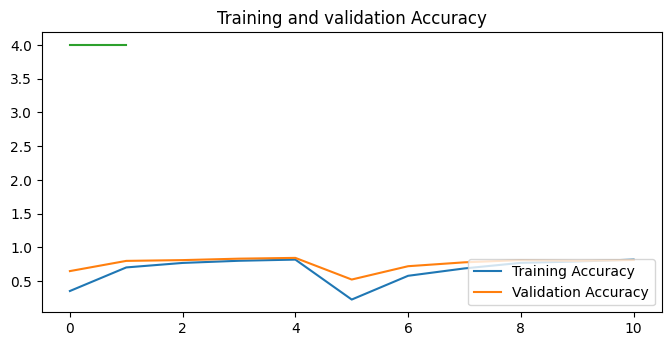

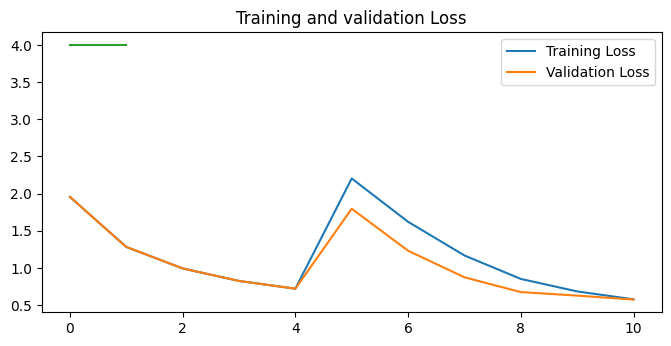

In [146]:
compare_history(history_3, history_4, initial_epochs=5)

# model_5: Fine_tuning with all data on existing model_3

In [82]:
# get data and unzip it

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Food_Image_Data/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [90]:
# Setup Directory path
train_dir_all_data = "10_food_classes_all_data/train"
test_data = "10_food_classes_all_data/test"

In [91]:
# walk through data
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in '{dirpath}'.")

There are 2 directory and 0 images in '10_food_classes_all_data'.
There are 10 directory and 0 images in '10_food_classes_all_data/test'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directory and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 10 directory and 0 image

In [92]:
# Setup data inputs

train_data_10_full = image_dataset_from_directory(train_dir_all_data,
                                                  label_mode="categorical",
                                                  image_size=IMG_SIZE)

test_data = image_dataset_from_directory(test_data,
                                         label_mode="categorical",
                                         image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [147]:
# evaluate model_3
model_3.evaluate(test_data)

79/79 [==============================] - 170s 2s/step - loss: 0.5408 - accuracy: 0.8268


[0.5408459901809692, 0.8267999887466431]

In [148]:
# Checking which layers are trainable
for layer_number, layer in enumerate(model_3.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 Data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_2 True
4 output_layer True


In [149]:
# checking basse_model layer
for layer_number, layer in enumerate(model_3.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [151]:
# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

fine_tune_eppochs = initial_epochs + 5

history_5 = model_3.fit(train_data_10_full,
                        epochs=fine_tune_epoch,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        initial_epoch=history_3.epoch[-1],
                        callbacks=[create_tensorboard_callback(dir_name="transfer_laerning",
                                                               experiment_name="10_class_full_data_finetuning")])

Saving TensorBoard log file to: transfer_laerning/10_class_full_data_finetuning/20231225-093827 
Epoch 5/10
235/235 [==============================] - 720s 3s/step - loss: 0.6316 - accuracy: 0.7983 - val_loss: 0.3504 - val_accuracy: 0.8816
Epoch 6/10
235/235 [==============================] - 710s 3s/step - loss: 0.4246 - accuracy: 0.8612 - val_loss: 0.2985 - val_accuracy: 0.9030
Epoch 7/10
235/235 [==============================] - 699s 3s/step - loss: 0.3484 - accuracy: 0.8861 - val_loss: 0.2321 - val_accuracy: 0.9276
Epoch 8/10
235/235 [==============================] - 657s 3s/step - loss: 0.2794 - accuracy: 0.9047 - val_loss: 0.2663 - val_accuracy: 0.9095
Epoch 9/10
235/235 [==============================] - 703s 3s/step - loss: 0.2380 - accuracy: 0.9197 - val_loss: 0.2722 - val_accuracy: 0.9095
Epoch 10/10
235/235 [==============================] - 739s 3s/step - loss: 0.1944 - accuracy: 0.9349 - val_loss: 0.2814 - val_accuracy: 0.9178


In [152]:
# model evaluation
model_3.evaluate(test_data)

79/79 [==============================] - 184s 2s/step - loss: 0.2970 - accuracy: 0.9116


[0.2970450520515442, 0.9115999937057495]

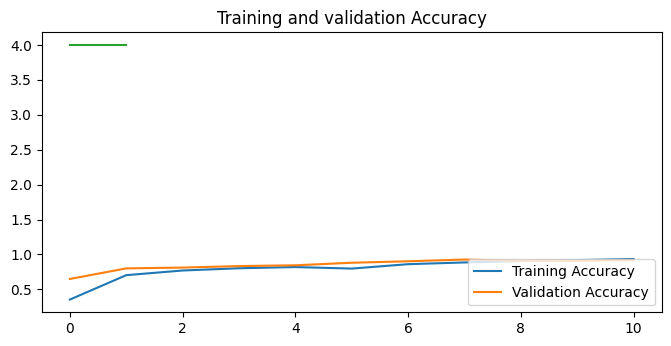

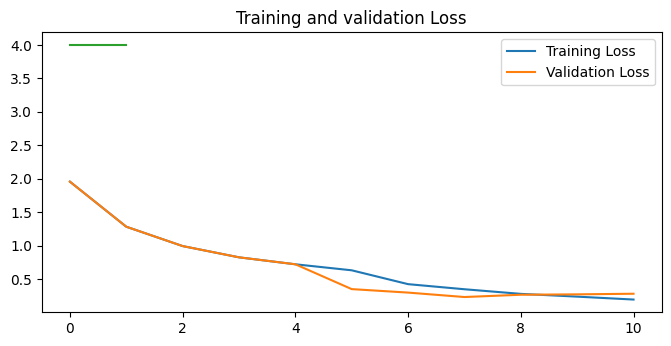

In [156]:
# compare history between the models
compare_history(history_3, history_5)